# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [10]:
import csv
import random
import numpy as np
import sys

In [11]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

The steps for computing linear regression are as follows:

- Separate the variables Features (X) and target(y).
- Created a weighted matrix and set the bias to zero.
- By multiplying the weights and feature matrices and applying bias, the estimated target value was calculated.
- Calculate the cost function and dw and db, respectively, using the derivative of the cost function w.r.t w and b.
- Gradient descent is used to update the weights and bias.
- For 1000 iterations, the above process is being repeated.
- We use the formula `Y = W' * X` to make predictions (where W' is Transpose of W)

MSE is calculated for several learning rates, and the learning rate with the lowest MSE is chosen to plot the parity plot.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [12]:
# Appending 1 (bias) to X dataset for both train and test.
for x in x_train:
    x.append(1)

for x in x_test:
    x.append(1)

In [13]:
# implement Linear Regression
learning_rate = [ 0.001, 0.005, 0.01, 0.3, 0.5 ]


def cost_fn(W, X, Y, m):
    """
    This Fn computes cost function.
        J(W) = 1/2m * ((W`*X) - Y)^2

    @return cost fn value
    """
    ans = np.subtract(np.dot(X,np.transpose(W)), Y)
    ans = np.dot(ans, ans)
    # ans = np.dot(np.transpose(ans), ans)
    ans = (0.5 * ans)/m
    return ans


def diff_cost_fn(j, W, X, Y, m):
    """
    This Fn computes derivative of Cost Fn.
        d(J(W))/d(Wj) = (1/m)*(W`*X) - Y) * Xj

    @return derivative of Cost Fn
    """

    ans = np.dot( X[:, j], np.subtract(np.dot(X, np.transpose(W)), Y))
    ans = ans/m

    return ans


def linear_reg(X, Y, a):
    """
    This Fn performs Gradient Descent to minimise cost function.

    @params:
        X = dataset of features, x_train
        Y = dataset of target feature, y_train
        a = learnign rate

    @return
        W = optimal W against learning rate "a"
        cost_min = minimum cost function value for optimal W.
    """
    W = np.zeros(X[0].shape)
    w_tmp = np.zeros(X[0].shape)
    w_min = np.array([])

    cost_min = sys.maxsize
    for i in range(100):
        for j in range(len(W)):
            w_tmp[j] = W[j] - (a * diff_cost_fn(j, W, X, Y, len(X)))
        cost = cost_fn(w_tmp, X, Y, len(X))
        W = w_tmp
        
        if cost <= cost_min:
            w_min = W
            cost_min = cost
        
    w_min = np.array(w_min)
    
    return w_min, cost_min


def predict(W, X):
    """
    This Fn predicts for a given optimal W for passed dataset X

    @return predicted dataset Y
    """
    return np.dot(X, np.transpose(W))




In [14]:

X = np.array(x_train)
Y = np.array(y_train)
c_min = sys.maxsize
w_optimal = np.array([])

for a in learning_rate:
    w_new, c = linear_reg(X, Y, a)

    if(c_min > c):
        c_min = c
        w_optimal = w_new

print("The learning rate for which you achieved the best MSE", (c_min*2))

The learning rate for which you achieved the best MSE 0.003809619929382043


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

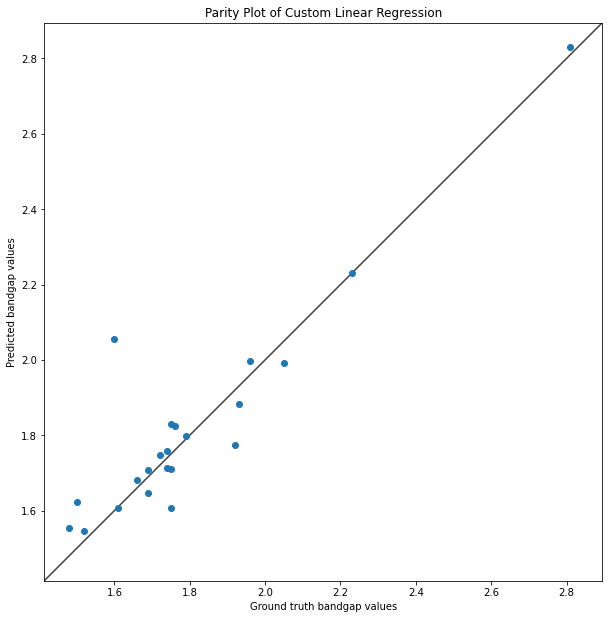

In [15]:
# Get the predictions of x_test into `y_pred`

#
# ...
y_pred = predict(w_optimal, x_test)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

We use regularization for minimizing the overfitting of data by penalizing the learning. 
**Ridge Regression**: In ridge regression we performs L2 regularization, i.e. we add penalty equivalent to square of the magnitude of coefficients.

`Minimization objective = Least Squares(Without Regularization) + α * (sum of square of coefficients)`

Additional term is called ridge penality and makes this function less sensitive towards training data.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [16]:
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

alpha_list = [100, 10, 1, 0.1, 0.01, 0.001]

rr_dict = dict()
for a in alpha_list:
    rr = Ridge(alpha=a)
    rr.fit(x_train, y_train)

    rr_dict[a] = np.sqrt(mean_squared_error(y_test, rr.predict(x_test)))

pd.DataFrame(list(rr_dict.items()), columns=["alpha", "MSE"])

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

,alpha,MSE
0,100.000,0.306568
1,10.000,0.200315
2,1.000,0.114636
3,0.100,0.117462
4,0.010,0.119087
5,0.001,0.119269


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

**Lasso regression** is similar to ridge regression and performs similar functionality, the only difference is that lasso uses L1 normalization i.e. absolute value of slope instead of squares of slope.

`Lasso regeression = Minimization objective = Least Squares(Without Regularization) + α * (abs(Slope))`

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [17]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr_dict = dict()
for a in alpha_list:
    lr = Lasso(alpha=a)
    lr.fit(x_train, y_train)

    lr_dict[a] = np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))


pd.DataFrame(list(lr_dict.items()), columns=["alpha", "MSE"])

,alpha,MSE
0,100.000,0.337599
1,10.000,0.337599
2,1.000,0.337599
3,0.100,0.306789
4,0.010,0.111429
5,0.001,0.116785
